![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/nlu/blob/master/examples//colab/Training/multi_lingual/binary_text_classification/NLU_multi_lingual_training_sentiment_classifier_demo_reddit.ipynb)


# Training a Sentiment Analysis Classifier with NLU 
## 2 class Reddit comments sentiment classifier training
With the [SentimentDL model](https://nlp.johnsnowlabs.com/docs/en/annotators#sentimentdl-multi-class-sentiment-analysis-annotator)  from Spark NLP you can achieve State Of the Art results on any multi class text classification problem 

This notebook showcases the following features : 

- How to train the deep learning classifier
- How to store a pipeline to disk
- How to load the pipeline from disk (Enables NLU offline mode)

You can achieve these results or even better on this dataset with training  data  : 

<br> 

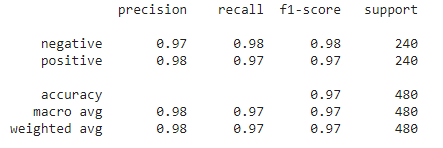


You can achieve these results or even better on this dataset with training  data  : 

<br> 

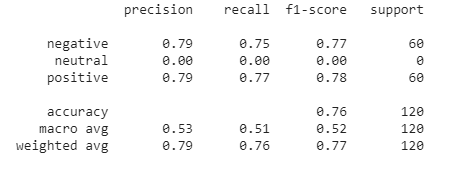

# 1. Install Java 8 and NLU

In [ ]:
!wget https://setup.johnsnowlabs.com/nlu/colab.sh -O - | bash
  

import nlu

--2021-05-05 08:05:45--  https://raw.githubusercontent.com/JohnSnowLabs/nlu/master/scripts/colab_setup.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1671 (1.6K) [text/plain]
Saving to: ‘STDOUT’

-                   100%[===================>]   1.63K  --.-KB/s    in 0s      

2021-05-05 08:05:45 (31.4 MB/s) - written to stdout [1671/1671]

Installing  NLU 3.0.0 with  PySpark 3.0.2 and Spark NLP 3.0.1 for Google Colab ...
     |████████████████████████████████| 204.8MB 66kB/s 
     |████████████████████████████████| 153kB 33.8MB/s 
     |████████████████████████████████| 204kB 22.3MB/s 
     |████████████████████████████████| 204kB 51.7MB/s 


# 2. Download Reddit  Sentiment dataset 
https://www.kaggle.com/cosmos98/twitter-and-reddit-sentimental-analysis-dataset
#Context

This is was a Dataset Created as a part of the university Project On Sentimental Analysis On Multi-Source Social Media Platforms using PySpark.

In [ ]:
! wget http://ckl-it.de/wp-content/uploads/2021/02/Reddit_Data_multi_lingual.csv


--2021-05-05 08:07:39--  http://ckl-it.de/wp-content/uploads/2021/02/Reddit_Data_multi_lingual.csv
Resolving ckl-it.de (ckl-it.de)... 217.160.0.108, 2001:8d8:100f:f000::209
Connecting to ckl-it.de (ckl-it.de)|217.160.0.108|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 193200 (189K) [text/csv]
Saving to: ‘Reddit_Data_multi_lingual.csv’

Reddit_Data_multi_l 100%[===================>] 188.67K   505KB/s    in 0.4s    

2021-05-05 08:07:40 (505 KB/s) - ‘Reddit_Data_multi_lingual.csv’ saved [193200/193200]



In [ ]:
import pandas as pd
train_path = '/content/Reddit_Data_multi_lingual.csv'

train_df = pd.read_csv(train_path)
# the text data to use for classification should be in a column named 'text'
columns=['text','y']
train_df = train_df[columns]
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(train_df, test_size=0.2)
train_df

,text,y
363,regardless the opposition all girouds goals ha...,positive
346,lost count the amount times possible debris h...,negative
254,true india needs top universities and not fdi...,positive
102,hishammuddin sounding super tired today edit s...,negative
212,these two observations will help you understan...,negative
...,...,...
522,holy shit what you for living,negative
466,jizzed hard just reading,negative
378,who will moderate the debate and which channel...,positive
366,was pro congress long time ago long time befo...,negative


# 3. Train Deep Learning Classifier using nlu.load('train.sentiment')

You dataset label column should be named 'y' and the feature column with text data should be named 'text'

In [ ]:
trainable_pipe = nlu.load('xx.embed_sentence.labse train.sentiment')
# We need to train longer and user smaller LR for NON-USE based sentence embeddings usually
# We could tune the hyperparameters further with hyperparameter tuning methods like gridsearch
# Also longer training gives more accuracy
trainable_pipe['sentiment_dl'].setMaxEpochs(60)  
trainable_pipe['sentiment_dl'].setLr(0.005) 
fitted_pipe = trainable_pipe.fit(train_df)
# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
from sklearn.metrics import classification_report
print(classification_report(preds['y'], preds['trained_sentiment']))

preds

labse download started this may take some time.
Approximate size to download 1.7 GB
[OK!]
sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]
              precision    recall  f1-score   support

    negative       0.97      0.98      0.98       240
    positive       0.98      0.97      0.97       240

    accuracy                           0.97       480
   macro avg       0.98      0.97      0.97       480
weighted avg       0.98      0.97      0.97       480



,text,origin_index,sentence_embedding_labse,y,document,trained_sentiment_confidence,trained_sentiment,sentence
0,regardless the opposition all girouds goals ha...,363,"[0.016946014016866684, -0.04248768463730812, 0...",positive,regardless the opposition all girouds goals ha...,0.999915,positive,[regardless the opposition all girouds goals h...
1,lost count the amount times possible debris h...,346,"[-0.0054521397687494755, 0.033800169825553894,...",negative,lost count the amount times possible debris ha...,0.999966,negative,[lost count the amount times possible debris h...
2,true india needs top universities and not fdi...,254,"[-0.026513056829571724, 0.022836964577436447, ...",positive,true india needs top universities and not fdi ...,0.999881,positive,[true india needs top universities and not fdi...
3,hishammuddin sounding super tired today edit s...,102,"[-0.024292560294270515, 0.001604165299795568, ...",negative,hishammuddin sounding super tired today edit s...,0.999243,negative,[hishammuddin sounding super tired today edit ...
4,these two observations will help you understan...,212,"[0.01662716642022133, 0.009799161925911903, 0....",negative,these two observations will help you understan...,0.992540,negative,[these two observations will help you understa...
...,...,...,...,...,...,...,...,...
475,holy shit what you for living,522,"[0.009813179261982441, -0.07502918690443039, 0...",negative,holy shit what you for living,0.999532,negative,[holy shit what you for living]
476,jizzed hard just reading,466,"[0.021288076415657997, -0.032137248665094376, ...",negative,jizzed hard just reading,0.999912,negative,[jizzed hard just reading]
477,who will moderate the debate and which channel...,378,"[0.02036549150943756, 0.0054930429905653, -0.0...",positive,who will moderate the debate and which channel...,0.998263,positive,[who will moderate the debate and which channe...
478,was pro congress long time ago long time befo...,366,"[4.2188377847196534e-05, 0.005828899797052145,...",negative,was pro congress long time ago long time befor...,0.998717,negative,[was pro congress long time ago long time befo...


# 3.1 evaluate on Test Data

In [ ]:
preds = fitted_pipe.predict(test_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['trained_sentiment']))


              precision    recall  f1-score   support

    negative       0.79      0.75      0.77        60
     neutral       0.00      0.00      0.00         0
    positive       0.79      0.77      0.78        60

    accuracy                           0.76       120
   macro avg       0.53      0.51      0.52       120
weighted avg       0.79      0.76      0.77       120



#4. Test Model  with  20 languages!

In [ ]:
train_df = pd.read_csv("Reddit_Data_multi_lingual.csv")
preds = fitted_pipe.predict(train_df[["test_sentences","y"]].iloc[:100],output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['trained_sentiment']))

preds

              precision    recall  f1-score   support

    negative       0.81      0.81      0.81        48
     neutral       0.00      0.00      0.00         0
    positive       0.82      0.81      0.82        52

    accuracy                           0.81       100
   macro avg       0.55      0.54      0.54       100
weighted avg       0.82      0.81      0.81       100



,text,origin_index,sentence_embedding_labse,y,document,trained_sentiment_confidence,trained_sentiment,sentence
0,"je pravda, že přerušili moc, jaký kongres douc...",0,"[0.047071367502212524, -0.023074660450220108, ...",positive,"je pravda, že přerušili moc, jaký kongres douc...",0.999991,positive,"[je pravda, že přerušili moc, jaký kongres dou..."
1,今月のようにジルーをより良く仕上げる,1,"[-0.01690051332116127, -0.02084467001259327, -...",positive,今月のようにジルーをより良く仕上げる,0.999995,positive,[今月のようにジルーをより良く仕上げる]
2,נראה חרא עכשיו אבל עדיין גאה,2,"[-0.02598223276436329, -0.02113635465502739, -...",positive,נראה חרא עכשיו אבל עדיין גאה,0.978773,positive,[נראה חרא עכשיו אבל עדיין גאה]
3,פלור הבוער שונא את האל הרע הטוב ביותר,3,"[-0.044415801763534546, -0.01080454234033823, ...",negative,פלור הבוער שונא את האל הרע הטוב ביותר,0.999930,negative,[פלור הבוער שונא את האל הרע הטוב ביותר]
4,पूछ सकते हैं कि आप इस शक्तिशाली चीज़ के साथ क्...,4,"[0.040694039314985275, -0.02741238661110401, 0...",positive,पूछ सकते हैं कि आप इस शक्तिशाली चीज़ के साथ क्...,0.980074,positive,[पूछ सकते हैं कि आप इस शक्तिशाली चीज़ के साथ क...
...,...,...,...,...,...,...,...,...
95,这并不奇怪,95,"[0.026199784129858017, -0.0617312416434288, -0...",positive,这并不奇怪,0.997505,positive,[这并不奇怪]
96,এই পোস্টটি বিধি লঙ্ঘন করে সর্বশেষে আপনার ছাগল ...,96,"[0.03437668830156326, -0.033291902393102646, -...",negative,এই পোস্টটি বিধি লঙ্ঘন করে সর্বশেষে আপনার ছাগল ...,0.999943,negative,[এই পোস্টটি বিধি লঙ্ঘন করে সর্বশেষে আপনার ছাগল...
97,سنا ہے براہ راست لائن نریندر مودی ہے جو کسی بھ...,97,"[-0.0582120455801487, 0.05610273778438568, 0.0...",positive,سنا ہے براہ راست لائن نریندر مودی ہے جو کسی بھ...,0.999853,positive,[سنا ہے براہ راست لائن نریندر مودی ہے جو کسی ب...
98,allah lanet olsun bu şərhlərə hindistandan çox...,98,"[-0.02142353542149067, 0.011710312217473984, -...",negative,allah lanet olsun bu şərhlərə hindistandan çox...,0.972011,positive,[allah lanet olsun bu şərhlərə hindistandan ço...


# The Model understands Englsih
![en](https://www.worldometers.info/img/flags/small/tn_nz-flag.gif)

In [ ]:
fitted_pipe.predict("I am depressed because of my recent break up and I spend all my time crying, I want the pain to go away... ")


,origin_index,sentence_embedding_labse,document,trained_sentiment_confidence,trained_sentiment,sentence
0,0,"[-0.023606013506650925, -0.02828284353017807, ...",I am depressed because of my recent break up a...,0.999837,negative,[I am depressed because of my recent break up ...


In [ ]:
fitted_pipe.predict("The love of my life proposed me , I feel like the happiest person alive!")

,origin_index,sentence_embedding_labse,document,trained_sentiment_confidence,trained_sentiment,sentence
0,0,"[-0.0050350213423371315, 0.022905258461833, -0...","The love of my life proposed me , I feel like ...",0.999997,positive,"[The love of my life proposed me , I feel like..."


# The Model understands German
![de](https://www.worldometers.info/img/flags/small/tn_gm-flag.gif)

In [ ]:
# German for:'The love of my life proposed me , I feel like the happiest person alive!'
fitted_pipe.predict("Die Liebe meines Lebens schlug mich vor, ich fühle mich wie die glücklichste Person am Leben!")

,origin_index,sentence_embedding_labse,document,trained_sentiment_confidence,trained_sentiment,sentence
0,0,"[0.006932601798325777, -0.008974265307188034, ...","Die Liebe meines Lebens schlug mich vor, ich f...",0.999992,positive,"[Die Liebe meines Lebens schlug mich vor, ich ..."


In [ ]:
# German for: 'I am depressed because of my recent break up and I spend all my time crying, I want the pain to go away...'
fitted_pipe.predict("Ich bin wegen meiner kürzlichen Trennung depressiv und verbringe meine ganze Zeit damit zu weinen. Ich möchte, dass die Schmerzen verschwinden ... ")
		

,origin_index,sentence_embedding_labse,document,trained_sentiment_confidence,trained_sentiment,sentence
0,0,"[-0.04037578031420708, -0.019928034394979477, ...",Ich bin wegen meiner kürzlichen Trennung depre...,0.999968,negative,[Ich bin wegen meiner kürzlichen Trennung depr...


# The Model understands Chinese
![zh](https://www.worldometers.info/img/flags/small/tn_ch-flag.gif)

In [ ]:

# Chinese for: 'I am depressed because of my recent break up and I spend all my time crying, I want the pain to go away...'
fitted_pipe.predict("由于最近的分手，我感到沮丧，我花了所有的时间哭泣，我希望痛苦能够消失... ")
		

,origin_index,sentence_embedding_labse,document,trained_sentiment_confidence,trained_sentiment,sentence
0,0,"[-0.04107382893562317, -0.04438788816332817, 0...",由于最近的分手，我感到沮丧，我花了所有的时间哭泣，我希望痛苦能够消失...,0.999859,negative,"[由于最近的分手，我感到沮丧，我花了所有的时间哭泣，我希望痛苦能够消失., ..]"


In [ ]:
# Chinese for : "The love of my life proposed me , I feel like the happiest person alive!"
fitted_pipe.predict("我一生的爱向我提出了我，我感觉自己是最幸福的人！")


,origin_index,sentence_embedding_labse,document,trained_sentiment_confidence,trained_sentiment,sentence
0,0,"[-0.025317609310150146, -0.04454464837908745, ...",我一生的爱向我提出了我，我感觉自己是最幸福的人！,0.999999,positive,[我一生的爱向我提出了我，我感觉自己是最幸福的人！]


# Model understands Afrikaans

![af](https://www.worldometers.info/img/flags/small/tn_sf-flag.gif)



In [ ]:
# Afrikaans for 'The love of my life proposed me , I feel like the happiest person alive!'
fitted_pipe.predict("Die liefde van my lewe het my voorgestel, ek voel soos die gelukkigste persoon wat lewendig is!")


,origin_index,sentence_embedding_labse,document,trained_sentiment_confidence,trained_sentiment,sentence
0,0,"[-0.017393874004483223, 0.005962136201560497, ...","Die liefde van my lewe het my voorgestel, ek v...",1.0,positive,"[Die liefde van my lewe het my voorgestel, ek ..."


In [ ]:
#  Afrikaans for: 'I am depressed because of my recent break up and I spend all my time crying, I want the pain to go away...'
fitted_pipe.predict("Ek is depressief as gevolg van my onlangse breuk en ek spandeer al my tyd om te huil, ek wil hê dat die pyn moet verdwyn ... ")
		

,origin_index,sentence_embedding_labse,document,trained_sentiment_confidence,trained_sentiment,sentence
0,0,"[-0.042933885008096695, -0.0334482416510582, 0...",Ek is depressief as gevolg van my onlangse bre...,0.999771,negative,[Ek is depressief as gevolg van my onlangse br...


# The model understands Vietnamese
![vi](https://www.worldometers.info/img/flags/small/tn_vm-flag.gif)

In [ ]:
# Vietnamese for : 'The love of my life proposed me , I feel like the happiest person alive!'
fitted_pipe.predict('Tình yêu của đời tôi đề xuất tôi, tôi cảm thấy như người hạnh phúc nhất còn sống!')


,origin_index,sentence_embedding_labse,document,trained_sentiment_confidence,trained_sentiment,sentence
0,0,"[-0.03576832264661789, -0.017268849536776543, ...","Tình yêu của đời tôi đề xuất tôi, tôi cảm thấy...",0.999889,positive,"[Tình yêu của đời tôi đề xuất tôi, tôi cảm thấ..."


In [ ]:
# Vietnamese for: 'I am depressed because of my recent break up and I spend all my time crying, I want the pain to go away...'
fitted_pipe.predict("Tôi chán nản vì cuộc chia tay gần đây và tôi dành toàn bộ thời gian để khóc, tôi muốn nỗi đau qua đi ... ")
		

,origin_index,sentence_embedding_labse,document,trained_sentiment_confidence,trained_sentiment,sentence
0,0,"[-0.009116670116782188, -0.007585291285067797,...",Tôi chán nản vì cuộc chia tay gần đây và tôi d...,0.99989,negative,[Tôi chán nản vì cuộc chia tay gần đây và tôi ...


# The model understands Japanese
![ja](https://www.worldometers.info/img/flags/small/tn_ja-flag.gif)


In [ ]:

# Japanese for : 'The love of my life proposed me , I feel like the happiest person alive!'
fitted_pipe.predict('私の人生の愛は私を提案しました、私は生きている最も幸せな人のように感じます！')

,origin_index,sentence_embedding_labse,document,trained_sentiment_confidence,trained_sentiment,sentence
0,0,"[-0.011561010964214802, 0.00965394638478756, -...",私の人生の愛は私を提案しました、私は生きている最も幸せな人のように感じます！,1.0,positive,[私の人生の愛は私を提案しました、私は生きている最も幸せな人のように感じます！]


In [ ]:
# Japanese for: 'I am depressed because of my recent break up and I spend all my time crying, I want the pain to go away...'
fitted_pipe.predict("私は最近の別れのために落ち込んでいて、私はずっと泣いて過ごしています、私は痛みを取り除きたいです... ")
		

,origin_index,sentence_embedding_labse,document,trained_sentiment_confidence,trained_sentiment,sentence
0,0,"[-0.03512014076113701, -0.03604918718338013, 0...",私は最近の別れのために落ち込んでいて、私はずっと泣いて過ごしています、私は痛みを取り除きたい...,0.999896,negative,[私は最近の別れのために落ち込んでいて、私はずっと泣いて過ごしています、私は痛みを取り除きた...


# The model understands Zulu
![zu](https://www.worldometers.info/img/flags/small/tn_sf-flag.gif)

In [ ]:
# Zulu for : 'The love of my life proposed me , I feel like the happiest person alive!'
fitted_pipe.predict('Uthando lwempilo yami lungihlongosile, ngizwa sengathi umuntu ojabule kunabo bonke ephila!')


,origin_index,sentence_embedding_labse,document,trained_sentiment_confidence,trained_sentiment,sentence
0,0,"[-0.011278740130364895, -0.005037062801420689,...","Uthando lwempilo yami lungihlongosile, ngizwa ...",0.999999,positive,"[Uthando lwempilo yami lungihlongosile, ngizwa..."


In [ ]:
#  Zulu for: 'I am depressed because of my recent break up and I spend all my time crying, I want the pain to go away...'
fitted_pipe.predict("Ngicindezelekile ngenxa yokuhlukana kwami kwakamuva futhi ngichitha sonke isikhathi sami ngikhala, ngifuna ubuhlungu buphele ... ")
		

,origin_index,sentence_embedding_labse,document,trained_sentiment_confidence,trained_sentiment,sentence
0,0,"[-0.013925889506936073, -0.032107651233673096,...",Ngicindezelekile ngenxa yokuhlukana kwami kwak...,0.999893,negative,[Ngicindezelekile ngenxa yokuhlukana kwami kwa...


# The  Model understands Turkish
![tr](https://www.worldometers.info/img/flags/small/tn_tu-flag.gif)

In [ ]:
# Turkish for : 'The love of my life proposed me , I feel like the happiest person alive!'
fitted_pipe.predict('Hayatımın aşkı bana teklif etti, yaşayan en mutlu insan gibi hissediyorum! ')



,origin_index,sentence_embedding_labse,document,trained_sentiment_confidence,trained_sentiment,sentence
0,0,"[0.0015444883611053228, 0.017139634117484093, ...","Hayatımın aşkı bana teklif etti, yaşayan en mu...",0.999999,positive,"[Hayatımın aşkı bana teklif etti, yaşayan en m..."


In [ ]:
#  Turkish for: 'I am depressed because of my recent break up and I spend all my time crying, I want the pain to go away...'
fitted_pipe.predict("Son ayrılığımdan dolayı depresyondayım ve tüm zamanımı ağlayarak geçiriyorum, acının gitmesini istiyorum ... ")


,origin_index,sentence_embedding_labse,document,trained_sentiment_confidence,trained_sentiment,sentence
0,0,"[-0.04846595600247383, -0.041023433208465576, ...",Son ayrılığımdan dolayı depresyondayım ve tüm ...,0.999948,negative,[Son ayrılığımdan dolayı depresyondayım ve tüm...


#  The Model understands Hebrew
![he](https://www.worldometers.info/img/flags/small/tn_sf-flag.gif)

In [ ]:
# Hebrew for: 'I am depressed because of my recent break up and I spend all my time crying, I want the pain to go away...'
fitted_pipe.predict("אני בדיכאון בגלל הפרידה האחרונה שלי ואני מבלה את כל זמני בבכי, אני רוצה שהכאב ייעלם ... ")
		

,origin_index,sentence_embedding_labse,document,trained_sentiment_confidence,trained_sentiment,sentence
0,0,"[-0.04138200357556343, -0.05670207366347313, 0...",אני בדיכאון בגלל הפרידה האחרונה שלי ואני מבלה ...,0.999874,negative,[אני בדיכאון בגלל הפרידה האחרונה שלי ואני מבלה...


In [ ]:
# Hebrew for : 'The love of my life proposed me , I feel like the happiest person alive!'
fitted_pipe.predict('אהבת חיי הציעה אותי, אני מרגישה כמו האדם המאושר ביותר בחיים!')


,origin_index,sentence_embedding_labse,document,trained_sentiment_confidence,trained_sentiment,sentence
0,0,"[-0.021271945908665657, -0.02133464813232422, ...","אהבת חיי הציעה אותי, אני מרגישה כמו האדם המאוש...",1.0,positive,"[אהבת חיי הציעה אותי, אני מרגישה כמו האדם המאו..."


# The Model understands Telugu
![te](https://www.worldometers.info/img/flags/small/tn_in-flag.gif)


In [ ]:
# Telugu for : 'The love of my life proposed me , I feel like the happiest person alive!'
fitted_pipe.predict('నా జీవితం యొక్క ప్రేమ నన్ను ప్రతిపాదించింది, సజీవంగా ఉన్న వ్యక్తిగా నేను భావిస్తున్నాను!' )

,origin_index,sentence_embedding_labse,document,trained_sentiment_confidence,trained_sentiment,sentence
0,0,"[-0.011076044291257858, -0.022865094244480133,...","నా జీవితం యొక్క ప్రేమ నన్ను ప్రతిపాదించింది, స...",0.999512,positive,"[నా జీవితం యొక్క ప్రేమ నన్ను ప్రతిపాదించింది, ..."


In [ ]:

# Telugu for: 'I am depressed because of my recent break up and I spend all my time crying, I want the pain to go away...'
fitted_pipe.predict("నా ఇటీవలి విడిపోవడం వల్ల నేను నిరాశకు గురయ్యాను మరియు నా సమయాన్ని ఏడుస్తూనే ఉన్నాను, నొప్పి పోవాలని నేను కోరుకుంటున్నాను ... ")


,origin_index,sentence_embedding_labse,document,trained_sentiment_confidence,trained_sentiment,sentence
0,0,"[-0.025107204914093018, -0.03688901290297508, ...",నా ఇటీవలి విడిపోవడం వల్ల నేను నిరాశకు గురయ్యాన...,0.999736,negative,[నా ఇటీవలి విడిపోవడం వల్ల నేను నిరాశకు గురయ్యా...


# Model understands Russian
![ru](https://www.worldometers.info/img/flags/small/tn_rs-flag.gif)


In [ ]:
#  Russian for: 'I am depressed because of my recent break up and I spend all my time crying, I want the pain to go away...'
fitted_pipe.predict("Я в депрессии из-за моего недавнего разрыва, и я все время плачу, я хочу, чтобы боль ушла ... ")
		

,origin_index,sentence_embedding_labse,document,trained_sentiment_confidence,trained_sentiment,sentence
0,0,"[-0.042304884642362595, -0.020287370309233665,...","Я в депрессии из-за моего недавнего разрыва, и...",0.999906,negative,"[Я в депрессии из-за моего недавнего разрыва, ..."


In [ ]:
# Russian for : 'The love of my life proposed me , I feel like the happiest person alive!'
fitted_pipe.predict('Этот фильм был отличным!')

,origin_index,sentence_embedding_labse,document,trained_sentiment_confidence,trained_sentiment,sentence
0,0,"[-0.03249521926045418, -0.04056306555867195, -...",Этот фильм был отличным!,1.0,positive,[Этот фильм был отличным!]


# Model understands Urdu
![ur](https://www.worldometers.info/img/flags/small/tn_pk-flag.gif)

In [ ]:
# Urdu for: 'I am depressed because of my recent break up and I spend all my time crying, I want the pain to go away...'
fitted_pipe.predict("میں حالیہ بریک اپ کی وجہ سے افسردہ ہوں اور میں اپنا سارا وقت روتے ہوئے گزارتا ہوں ، میں چاہتا ہوں کہ درد دور ہو ... ")
		

,origin_index,sentence_embedding_labse,document,trained_sentiment_confidence,trained_sentiment,sentence
0,0,"[-0.0319853238761425, -0.042503755539655685, 0...",میں حالیہ بریک اپ کی وجہ سے افسردہ ہوں اور میں...,0.999827,negative,[میں حالیہ بریک اپ کی وجہ سے افسردہ ہوں اور می...


In [ ]:
# Urdu for : 'The love of my life proposed me , I feel like the happiest person alive!'
fitted_pipe.predict('میری زندگی کی محبت نے مجھے پیش کیا، مجھے سب سے خوشگوار شخص زندہ لگتا ہے!')

,origin_index,sentence_embedding_labse,document,trained_sentiment_confidence,trained_sentiment,sentence
0,0,"[-0.014539830386638641, -0.022852826863527298,...",میری زندگی کی محبت نے مجھے پیش کیا، مجھے سب سے...,0.999996,positive,[میری زندگی کی محبت نے مجھے پیش کیا، مجھے سب س...


# Model understands Hindi
![hi](https://www.worldometers.info/img/flags/small/tn_in-flag.gif)


In [ ]:
# Hindi for : 'The love of my life proposed me , I feel like the happiest person alive!'
fitted_pipe.predict('मेरे जीवन के प्यार ने मुझे प्रस्तावित किया, मुझे लगता है कि सबसे खुश व्यक्ति जीवित है!')

,origin_index,sentence_embedding_labse,document,trained_sentiment_confidence,trained_sentiment,sentence
0,0,"[-0.007552082184702158, 0.003644779557362199, ...","मेरे जीवन के प्यार ने मुझे प्रस्तावित किया, मु...",0.999995,positive,"[मेरे जीवन के प्यार ने मुझे प्रस्तावित किया, म..."


In [ ]:
# Hindi for: 'I am depressed because of my recent break up and I spend all my time crying, I want the pain to go away...'
fitted_pipe.predict("मेरे हालिया ब्रेक अप के कारण मैं उदास हूं और मैं अपना सारा समय रोने में बिताता हूं, मैं चाहता हूं कि दर्द दूर हो जाए ... ")
		

,origin_index,sentence_embedding_labse,document,trained_sentiment_confidence,trained_sentiment,sentence
0,0,"[-0.033875059336423874, -0.03928769379854202, ...",मेरे हालिया ब्रेक अप के कारण मैं उदास हूं और म...,0.999579,negative,[मेरे हालिया ब्रेक अप के कारण मैं उदास हूं और ...


# The model understands Tartar
![tt](https://www.worldometers.info/img/flags/small/tn_rs-flag.gif)

In [ ]:
# Tartar for: 'I am depressed because of my recent break up and I spend all my time crying, I want the pain to go away...'
fitted_pipe.predict("Соңгы аерылышуым аркасында мин депрессияләнәм һәм бөтен вакытымны елыйм, авыртуның китүен телим ... ")
		

,origin_index,sentence_embedding_labse,document,trained_sentiment_confidence,trained_sentiment,sentence
0,0,"[-0.04341091588139534, -0.04436178505420685, 0...",Соңгы аерылышуым аркасында мин депрессияләнәм ...,0.999768,negative,[Соңгы аерылышуым аркасында мин депрессияләнәм...


In [ ]:
# Tartar for : 'The love of my life proposed me , I feel like the happiest person alive!'
fitted_pipe.predict('Тормышымның мәхәббәте миңа тәкъдим итте, мин үземне иң бәхетле кеше кебек хис итәм!')

,origin_index,sentence_embedding_labse,document,trained_sentiment_confidence,trained_sentiment,sentence
0,0,"[-0.0025619822554290295, -0.02031664550304413,...","Тормышымның мәхәббәте миңа тәкъдим итте, мин ү...",0.999999,positive,"[Тормышымның мәхәббәте миңа тәкъдим итте, мин ..."


# The Model understands French
![fr](https://www.worldometers.info/img/flags/small/tn_fr-flag.gif)

In [ ]:
# French for: 'I am depressed because of my recent break up and I spend all my time crying, I want the pain to go away...'
fitted_pipe.predict("Je suis déprimé à cause de ma récente rupture et je passe tout mon temps à pleurer, je veux que la douleur disparaisse ... ")
		

,origin_index,sentence_embedding_labse,document,trained_sentiment_confidence,trained_sentiment,sentence
0,0,"[-0.026194952428340912, -0.031189769506454468,...",Je suis déprimé à cause de ma récente rupture ...,0.999835,negative,[Je suis déprimé à cause de ma récente rupture...


In [ ]:
# French for : 'The love of my life proposed me , I feel like the happiest person alive!'
fitted_pipe.predict("L'amour de ma vie m'a proposé, je me sens comme la personne la plus heureuse en vie!")

,origin_index,sentence_embedding_labse,document,trained_sentiment_confidence,trained_sentiment,sentence
0,0,"[-0.018955670297145844, -0.024394378066062927,...","L'amour de ma vie m'a proposé, je me sens comm...",1.0,positive,"[L'amour de ma vie m'a proposé, je me sens com..."


# The Model understands Thai
![th](https://www.worldometers.info/img/flags/small/tn_th-flag.gif)

In [ ]:
# Thai for : 'The love of my life proposed me , I feel like the happiest person alive!'
fitted_pipe.predict("ความรักในชีวิตของฉันเสนอให้ฉันฉันรู้สึกเหมือนคนที่มีความสุขที่สุดที่มีชีวิตอยู่!")

,origin_index,sentence_embedding_labse,document,trained_sentiment_confidence,trained_sentiment,sentence
0,0,"[-0.031056925654411316, -0.042199380695819855,...",ความรักในชีวิตของฉันเสนอให้ฉันฉันรู้สึกเหมือนค...,0.999998,positive,[ความรักในชีวิตของฉันเสนอให้ฉันฉันรู้สึกเหมือน...


In [ ]:
# Thai for: 'I am depressed because of my recent break up and I spend all my time crying, I want the pain to go away...'
fitted_pipe.predict("ฉันรู้สึกหดหู่ใจเพราะเพิ่งเลิกกันและฉันใช้เวลาร้องไห้ตลอดเวลาฉันอยากให้ความเจ็บปวดหายไป ... ")
		

,origin_index,sentence_embedding_labse,document,trained_sentiment_confidence,trained_sentiment,sentence
0,0,"[-0.01441363524645567, -0.05407707020640373, 0...",ฉันรู้สึกหดหู่ใจเพราะเพิ่งเลิกกันและฉันใช้เวลา...,0.999793,negative,[ฉันรู้สึกหดหู่ใจเพราะเพิ่งเลิกกันและฉันใช้เวล...


# The Model understands Khmer
![km](https://www.worldometers.info/img/flags/small/tn_cb-flag.gif)

In [ ]:
# Khmer for : 'The love of my life proposed me , I feel like the happiest person alive!'
fitted_pipe.predict("សេចក្តីស្រឡាញ់នៃជីវិតរបស់ខ្ញុំបានស្នើខ្ញុំខ្ញុំមានអារម្មណ៍ថាដូចជាមនុស្សដែលសប្បាយរីករាយបំផុតនៅរស់! ")

,origin_index,sentence_embedding_labse,document,trained_sentiment_confidence,trained_sentiment,sentence
0,0,"[0.002843152964487672, -0.021134117618203163, ...",សេចក្តីស្រឡាញ់នៃជីវិតរបស់ខ្ញុំបានស្នើខ្ញុំខ្ញុ...,0.999999,positive,[សេចក្តីស្រឡាញ់នៃជីវិតរបស់ខ្ញុំបានស្នើខ្ញុំខ្ញ...


In [ ]:
# Khmer for: 'I am depressed because of my recent break up and I spend all my time crying, I want the pain to go away...'
fitted_pipe.predict("ខ្ញុំក្រៀមក្រំណាស់ដោយសារតែការបែកបាក់ថ្មីៗនេះហើយខ្ញុំចំណាយពេលវេលាយំអស់មួយជីវិតខ្ញុំចង់អោយការឈឺចាប់បាត់ទៅវិញ ... ")
		

,origin_index,sentence_embedding_labse,document,trained_sentiment_confidence,trained_sentiment,sentence
0,0,"[-0.024856086820364, -0.05315130203962326, -0....",ខ្ញុំក្រៀមក្រំណាស់ដោយសារតែការបែកបាក់ថ្មីៗនេះហើ...,0.999944,negative,[ខ្ញុំក្រៀមក្រំណាស់ដោយសារតែការបែកបាក់ថ្មីៗនេះហ...


# The Model understands Yiddish
![yi](https://www.worldometers.info/img/flags/small/tn_pl-flag.gif)

In [ ]:
# Yiddish for : 'The love of my life proposed me , I feel like the happiest person alive!'
fitted_pipe.predict("די ליבע פון מיין לעבן פארגעלייגט מיר, איך פילן ווי די כאַפּיאַסט מענטש לעבעדיק!")

,origin_index,sentence_embedding_labse,document,trained_sentiment_confidence,trained_sentiment,sentence
0,0,"[-0.019913051277399063, 0.015512099489569664, ...","די ליבע פון מיין לעבן פארגעלייגט מיר, איך פילן...",0.999998,positive,"[די ליבע פון מיין לעבן פארגעלייגט מיר, איך פיל..."


In [ ]:
# Yiddish for: 'I am depressed because of my recent break up and I spend all my time crying, I want the pain to go away...'
fitted_pipe.predict("איך בין דערשלאָגן ווייַל פון מיין לעצטנס ברעכן זיך און איך פאַרברענגען אַלע מיין צייט וויינען, איך ווילן די ווייטיק וועט גיין אַוועק ... ")
		

,origin_index,sentence_embedding_labse,document,trained_sentiment_confidence,trained_sentiment,sentence
0,0,"[-0.02142149768769741, -0.04973936453461647, 0...",איך בין דערשלאָגן ווייַל פון מיין לעצטנס ברעכן...,0.999752,negative,[איך בין דערשלאָגן ווייַל פון מיין לעצטנס ברעכ...


# The Model understands Kygrgyz
![ky](https://www.worldometers.info/img/flags/small/tn_kg-flag.gif)

In [ ]:
# Kygrgyz for : 'The love of my life proposed me , I feel like the happiest person alive!'
fitted_pipe.predict("Менин жашоомдун сүйүүсү мени сунуш кылды, мен өзүмдү бактылуу адамдай сезип жатам!|")

,origin_index,sentence_embedding_labse,document,trained_sentiment_confidence,trained_sentiment,sentence
0,0,"[-0.030747268348932266, -0.025966504588723183,...","Менин жашоомдун сүйүүсү мени сунуш кылды, мен ...",0.999741,positive,"[Менин жашоомдун сүйүүсү мени сунуш кылды, мен..."


In [ ]:

# Kygrgyz for: 'I am depressed because of my recent break up and I spend all my time crying, I want the pain to go away...'
fitted_pipe.predict("Менин акыркы ажырашуумдан улам депрессияга кабылып, бардык убактымды ыйлап өткөрөм, азаптын басылышын каалайм ... ")
		

,origin_index,sentence_embedding_labse,document,trained_sentiment_confidence,trained_sentiment,sentence
0,0,"[-0.04204171150922775, -0.022934677079319954, ...",Менин акыркы ажырашуумдан улам депрессияга каб...,0.999795,negative,[Менин акыркы ажырашуумдан улам депрессияга ка...


# The Model understands Tamil
![ta](https://www.worldometers.info/img/flags/small/tn_in-flag.gif)

In [ ]:
# Tamil for: 'I am depressed because of my recent break up and I spend all my time crying, I want the pain to go away...'
fitted_pipe.predict("நான் சமீபத்தில் பிரிந்ததால் மனச்சோர்வடைந்து, என் நேரத்தை அழுதபடி செலவிடுகிறேன், வலி நீங்க வேண்டும் என்று நான் விரும்புகிறேன் ... ")
		

,origin_index,sentence_embedding_labse,document,trained_sentiment_confidence,trained_sentiment,sentence
0,0,"[-0.02321743592619896, -0.03598147630691528, 0...","நான் சமீபத்தில் பிரிந்ததால் மனச்சோர்வடைந்து, எ...",0.999127,negative,"[நான் சமீபத்தில் பிரிந்ததால் மனச்சோர்வடைந்து, ..."


In [ ]:
# Tamil for : 'The love of my life proposed me , I feel like the happiest person alive!'
fitted_pipe.predict("என் வாழ்க்கையின் அன்பு என்னை முன்மொழிந்தது, உயிருடன் இருக்கும் மகிழ்ச்சியான நபராக நான் உணர்கிறேன்! ")

,origin_index,sentence_embedding_labse,document,trained_sentiment_confidence,trained_sentiment,sentence
0,0,"[-0.0001591779146110639, -0.012185914441943169...","என் வாழ்க்கையின் அன்பு என்னை முன்மொழிந்தது, உய...",0.999979,positive,"[என் வாழ்க்கையின் அன்பு என்னை முன்மொழிந்தது, உ..."


# 5. Lets save the model

In [ ]:
stored_model_path = './models/classifier_dl_trained' 
fitted_pipe.save(stored_model_path)

Stored model in ./models/classifier_dl_trained


# 6. Lets load the model from HDD.
This makes Offlien NLU usage possible!   
You need to call nlu.load(path=path_to_the_pipe) to load a model/pipeline from disk.

In [ ]:
import nlu
stored_model_path = './models/classifier_dl_trained' 
hdd_pipe = nlu.load(path=stored_model_path)
preds = hdd_pipe.predict('It was one of the best films i have ever watched in my entire life !!')
preds

,text,sentence,sentiment,document,origin_index,sentiment_confidence,sentence_embedding_from_disk
0,It was one of the best films i have ever watch...,[It was one of the best films i have ever watc...,"[positive, positive]",It was one of the best films i have ever watch...,8589934592,"[0.9999969, 0.9999969]","[[0.016216373071074486, 0.02273012138903141, -..."


In [ ]:
hdd_pipe.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> pipe['document_assembler'] has settable params:
pipe['document_assembler'].setCleanupMode('shrink')              | Info: possible values: disabled, inplace, inplace_full, shrink, shrink_full, each, each_full, delete_full | Currently set to : shrink
>>> pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'] has settable params:
pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'].setExplodeSentences(False)  | Info: whether to explode each sentence into a different row, for better parallelization. Defaults to false. | Currently set to : False
pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'].setStorageRef('SentenceDetectorDLModel_c83c27f46b97')  | Info: storage unique identifier | Currently set to : SentenceDetectorDLModel_c83c27f46b97
pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'].setEncoder(com.johnsnowlabs.nlp.annotators.sentence_detect